In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt

In [2]:
#   COLLECTION
df = pd.read_csv('heart.csv')
data = df.loc[:, ['Age', 'Sex', 'RestingBP', 'Cholesterol', 'HeartDisease']]

In [3]:
#   PREPROCESSING
info = data.describe()
info_rows = ['count', 'min', 'max']
num_rows = data.shape[0]

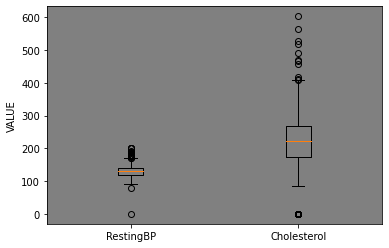

In [4]:
#   LOCATE OUTLIERS USING A BOXPLOT
ax = plt.axes()
ax.boxplot([data['RestingBP'], data['Cholesterol']], labels=['RestingBP', 'Cholesterol'])
ax.set_facecolor('grey')
ax.set_ylabel('VALUE')
plt.show()

In [8]:
#   REMOVING OUTLIERS
rbp_out = data[(data['RestingBP'] > 170) | (data['RestingBP'] < 90)].index.values
chol_out = data[(data['Cholesterol'] > 408) | (data['Cholesterol'] < 85)].index.values
outliers = (set(rbp_out).union(set(chol_out)))
for row in outliers:
    data.drop(row, axis=0, inplace=True)

num_rows = data.shape[0]
sex_counts = data['Sex'].value_counts()
counts = [sex_counts[0], sex_counts[1]]
gender = [sex_counts.index.values[0], sex_counts.index.values[1]]

There are 715 participants, 545 Male, 170 female.


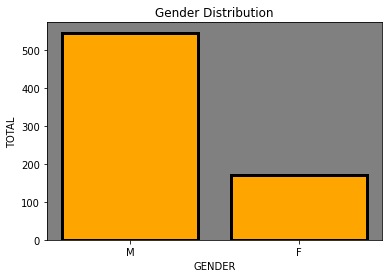

Participants are mostly between 50 and 60 years old.


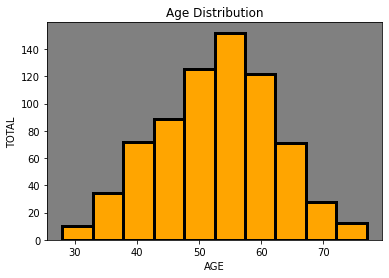

In [9]:
#   EDA
print(f'There are {num_rows} participants, {counts[0]} Male, {counts[1]} female.')
time.sleep(3)

ax = plt.axes()
ax.set_facecolor('grey')
ax.bar(gender, counts, color='orange', edgecolor='black', linewidth=3)
ax.set_title('Gender Distribution')
ax.set_xlabel('GENDER')
ax.set_ylabel('TOTAL')
plt.show(block=False)
plt.pause(4)
plt.close()

print('Participants are mostly between 50 and 60 years old.')
time.sleep(4)

ax = plt.axes()
ax.set_facecolor('grey')
ax.hist(x=data['Age'], bins=10, color='orange', edgecolor='black', linewidth=3)
ax.set_title('Age Distribution')
ax.set_xlabel('AGE')
ax.set_ylabel('TOTAL')
plt.show(block=False)
plt.pause(4)
plt.close()

In [10]:
#   SEARCH FOR RELATIONSHIPS BETWEEN NUMERICAL ATTRIBUTES
corrs = data.corr()
corrs

,Age,RestingBP,Cholesterol,HeartDisease
Age,1.000000,0.274542,0.073851,0.309619
RestingBP,0.274542,1.000000,0.086744,0.176738
Cholesterol,0.073851,0.086744,1.000000,0.102855
HeartDisease,0.309619,0.176738,0.102855,1.000000
